EDA (Exploratory Data Analysis) on "Hotel Bookings"
==================

- Here is a brief analytical and logical approach to gain information from the data. The main purpose of this is to find meaning in data so that the derived knowledge can be used to make informed decisions.

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

- The first step is to import the dataset. Since I have already downloaded the dataset in excel format, so I will import it using pandas.

In [4]:
df = pd.read_excel(r'C:\Users\Kapil\Desktop\kapil\python\data cleaning\hotel_bookings.xlsx')

In [5]:
pd.set_option('display.max_columns', 32)

In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


- Let's begin with our Exploratory Data Analysis, starting off by checking the shape of our dataset.

In [7]:
df.shape

(119390, 32)

- Before any analysis it is very important to know the datatype of each attribute and replace them with the appropriate datatype if required.

In [8]:
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

- From the above information we get to know that some of the variables are assigned wrong datatypes. Those variables are namely: "is_canceled", "arrival_date_year", "arrival_date_week_number", "arrival_date_day_of_month", "is_repeated_guest", "agent" and "company". These variables are to be replaced by categorical (datatype) as per the metadata provided.

In [9]:
df[['is_canceled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'agent', 'company']] = df[['is_canceled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'agent', 'company']].astype('category')

In [10]:
df[['is_canceled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'agent', 'company']].dtypes

is_canceled                  category
arrival_date_year            category
arrival_date_week_number     category
arrival_date_day_of_month    category
is_repeated_guest            category
agent                        category
company                      category
dtype: object

- Now I have properly converted them into categorical data. The next step is to find null values and duplicate records.

In [11]:
df.duplicated().sum()

31994

- So there is a total number of 31994 records that have been duplicated in the original dataset. Hence, I will drop them as it will only cause aberration in my analysis.

In [12]:
df.drop_duplicates(inplace = True)

In [13]:
df.shape

(87396, 32)

In [14]:
df.duplicated().sum()

0

- After getting rid of duplicate records, I will try to find null values from the dataset.

In [15]:
pd.isnull(df).sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


- The above data shows us that the maximum null values are associated with "company" and "agent" with a total number of 82137 and 12193 respectively followed by "country" with a number of 452 and lastly being "children" with only 4 null values.

### Let's begin playing with the data!

- The null values in "company" and "agent" inform us about certain things related to hotel bookings:
    - If a record consists of a null value in "company", then the customer has booked the hotel via "agent".
    - If a record consists of a null value in "agent", then the customer has booked the hotel via "company".
    - If a record consists of null values in both i.e., "company" and "agent", then the customer has booked the hotel without the intervention any agent or a company.
    

- Let us find some of the most trusted companies and agencies for hotel bookings.

In [16]:
df['company'].value_counts()

40.0     851
223.0    503
45.0     238
153.0    206
154.0    133
        ... 
347.0      1
352.0      1
368.0      1
373.0      1
6.0        1
Name: company, Length: 352, dtype: int64

In [17]:
trusted_companies = df['company'].value_counts().head(10)

In [18]:
trusted_companies

40.0     851
223.0    503
45.0     238
153.0    206
154.0    133
219.0    131
174.0    121
281.0    119
233.0     95
51.0      80
Name: company, dtype: int64

In [19]:
type(trusted_companies)

pandas.core.series.Series

- Since the "trusted_companies" is a series, therefore I will first convert it into a dataframe for further manipulation.

In [20]:
trusted_companies = pd.DataFrame({'company_id' : trusted_companies.index,
                 'frequency' : trusted_companies.values})

In [21]:
trusted_companies

,company_id,frequency
0,40.0,851
1,223.0,503
2,45.0,238
3,153.0,206
4,154.0,133
5,219.0,131
6,174.0,121
7,281.0,119
8,233.0,95
9,51.0,80


In [22]:
type(trusted_companies)

pandas.core.frame.DataFrame

- Now "trusted_companies" is a dataframe.


- Let us now represent the top 10 trusted companies using matplotlib

In [23]:
trusted_companies.sort_values('frequency', inplace = True)

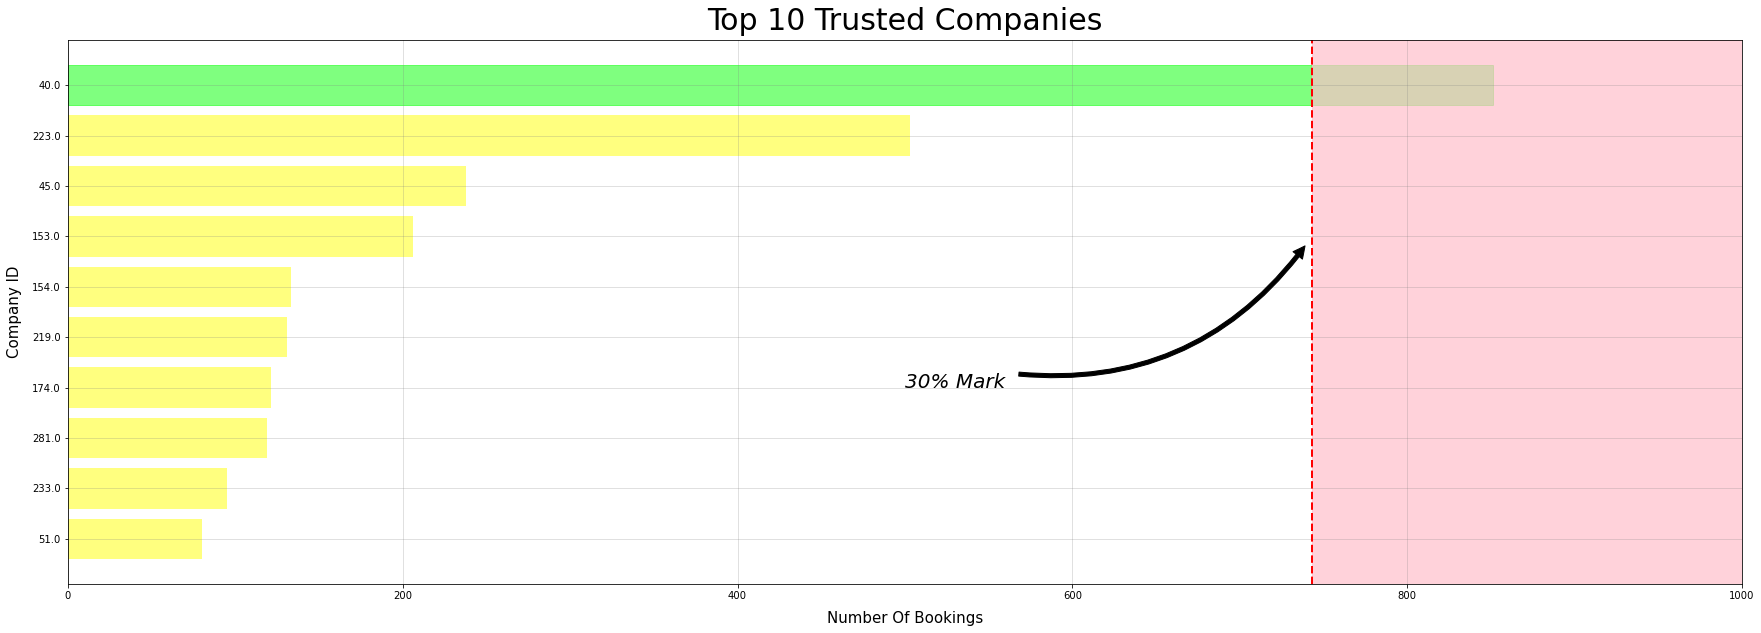

In [24]:
plt.figure(figsize = (30, 10))

x_pos = np.arange(0, 10)

plt.barh(x_pos, trusted_companies['frequency'], color = 'yellow', alpha = 0.5)[9].set_color('lime')

plt.axvline(x = 743.1, color = 'red', linestyle = '--', linewidth = 2)
plt.axvspan(743.1, 1000, color = 'pink', alpha = 0.7)

plt.yticks(x_pos, trusted_companies['company_id'])

plt.title('Top 10 Trusted Companies', fontsize = 30, pad = 10)
plt.xlabel('Number Of Bookings', fontsize = 15, labelpad = 10)
plt.ylabel('Company ID', fontsize = 15, labelpad = 10)

plt.xlim(0, 1000)

plt.annotate('30% Mark', fontstyle = 'italic', xy = (743.1, 6), xytext = (500, 3),
             arrowprops = dict(facecolor = 'black', shrink = 0.035, connectionstyle = 'arc3, rad = 0.3'), fontsize = 20)

plt.grid(alpha = 0.3, color = 'grey')

plt.show()

- From the above plot we can see that the company with "company_id" : "40" dominates the hotel (booking) market adequately and passes the 30% mark by a minimal gap of 120 bookings.


- Since we don't know anything about the name of the company due to anonymity reasons, therefore we cannot tell anything about company's specifications.

In [25]:
trusted_agent = df['agent'].value_counts().head(10)

In [26]:
trusted_agent

9.0      28759
240.0    13028
14.0      3349
7.0       3300
250.0     2779
241.0     1644
28.0      1502
8.0       1383
1.0       1232
6.0       1117
Name: agent, dtype: int64

In [27]:
trusted_agent = pd.DataFrame({'agent_id' : trusted_agent.index,
                 'frequency' : trusted_agent.values})

In [28]:
trusted_agent

,agent_id,frequency
0,9.0,28759
1,240.0,13028
2,14.0,3349
3,7.0,3300
4,250.0,2779
5,241.0,1644
6,28.0,1502
7,8.0,1383
8,1.0,1232
9,6.0,1117


In [29]:
trusted_agent.sort_values('frequency', inplace = True)

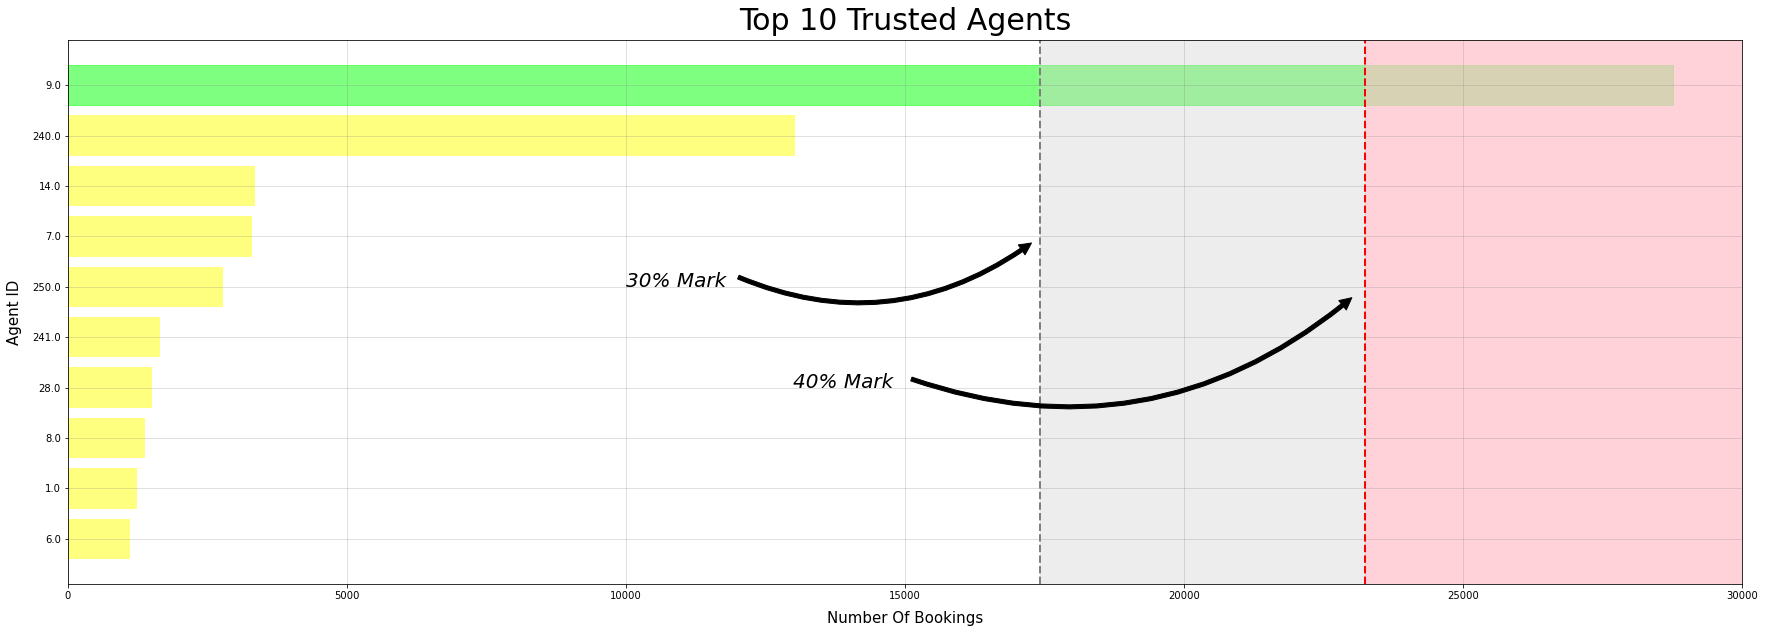

In [30]:
plt.figure(figsize = (30, 10))

x_pos = np.arange(0, 10)

plt.barh(x_pos, trusted_agent['frequency'], color = 'yellow', alpha = 0.5)[9].set_color('lime')

plt.axvline(x = 23237, color = 'red', linestyle = '--', linewidth = 2)
plt.axvspan(23237, 30000, color = 'pink', alpha = 0.7)
plt.axvline(x = 17427, color = 'gray', linestyle = '--', linewidth = 2)
plt.axvspan(17427, 23237, color = 'lightgray', alpha = 0.4)

plt.yticks(x_pos, trusted_agent['agent_id'])

plt.title('Top 10 Trusted Agents', fontsize = 30, pad = 10)
plt.xlabel('Number Of Bookings', fontsize = 15, labelpad = 10)
plt.ylabel('Agent ID', fontsize = 15, labelpad = 10)

plt.xlim(0, 30000)

plt.annotate('30% Mark', fontstyle = 'italic', xy = (17427, 6), xytext = (10000, 5),
             arrowprops = dict(facecolor = 'black', shrink = 0.035, connectionstyle = 'arc3, rad = 0.3'), fontsize = 20)
plt.annotate('40% Mark', fontstyle = 'italic', xy = (23237, 5), xytext = (13000, 3),
             arrowprops = dict(facecolor = 'black', shrink = 0.035, connectionstyle = 'arc3, rad = 0.3'), fontsize = 20)

plt.grid(alpha = 0.3, color = 'grey')

plt.show()

- From the above plot we can see that the agent with "agent_id" : "09" rules the hotel (booking) market decently and passes the 30% and even 40% mark very easily. The most trusted agent wins the race by 15731 number of bookings.


- After finding the best companies and agencies for hotel bookings let us first find the preferred type of hotel for bookings. For this I will try to put down the related data in the form of a pie chart for better visualization.

In [31]:
hotel_type = df['hotel'].value_counts()

In [32]:
hotel_type = pd.DataFrame({'type' : hotel_type.index,
                          'bookings' : hotel_type.values})

In [33]:
hotel_type

,type,bookings
0,City Hotel,53428
1,Resort Hotel,33968


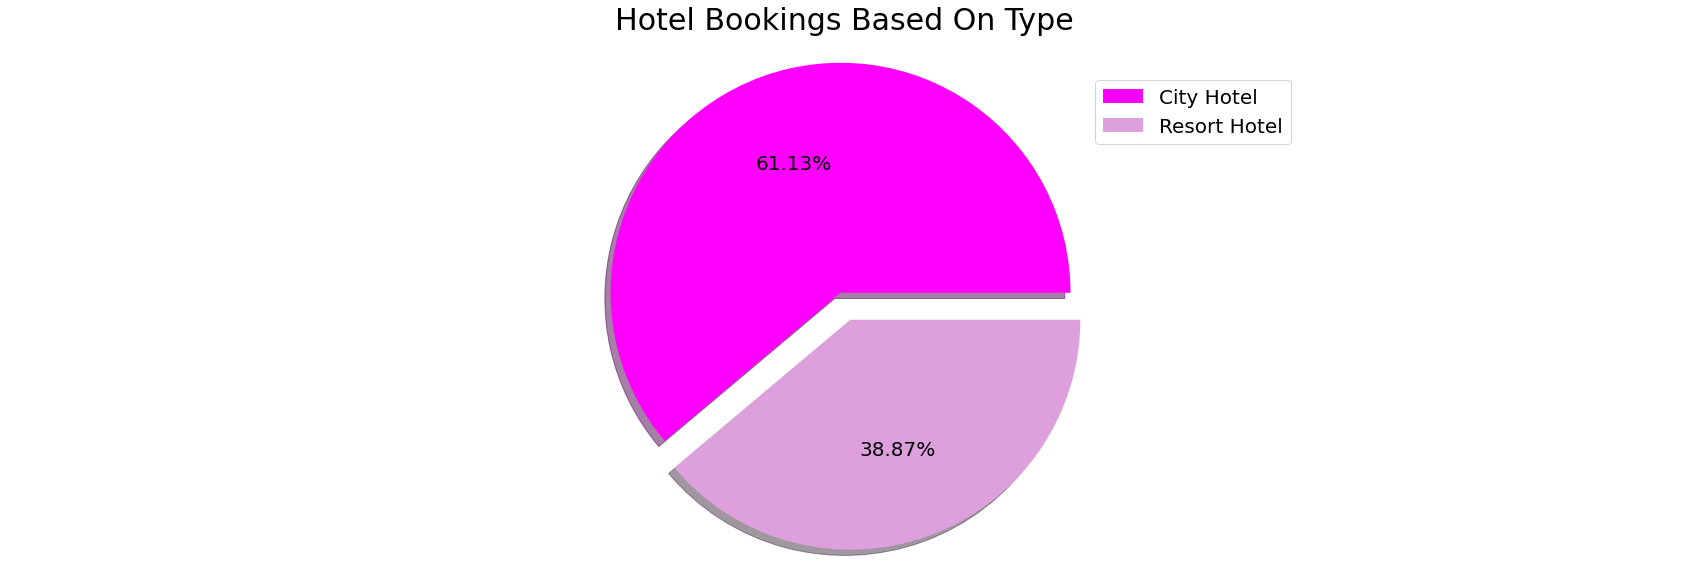

In [34]:
plt.figure(figsize = (30, 10))

plt.pie(hotel_type['bookings'], radius = 0.8, autopct = '%0.2f%%', explode = [0.1, 0], shadow = True, colors = ['fuchsia', 'plum'], textprops = {'fontsize' : 20})

plt.title('Hotel Bookings Based On Type', fontsize = 30)

plt.legend(fontsize = 20, loc = [0.65, 0.8], labels = ['City Hotel', 'Resort Hotel'])

plt.axis('equal')

plt.show()

- From the above plot we get to know that more than 50% of the customers preferred "City Hotels" over "Resort Hotels". I think this is because resorts tend to be more on the expensive side whereas city hotels serve as a place where you can stay if you are attending a conference in a different state, or merely wanting to spend a night within a new environment. On the other hand, resorts are created to provide more than just a place where you can sleep and stash your belongings.


- Apart from knowing the most preferred type of hotel, I am curious about the most favourable duration for the stay. And for this, I have to first calculate the duration for the stay from the original dataset.

In [35]:
max_days = (df['stays_in_weekend_nights']+df['stays_in_week_nights']).value_counts()

In [36]:
max_days = max_days.head(10)

In [37]:
max_days = pd.DataFrame({'days_stayed' : max_days.index,
                        'bookings' : max_days.values})

In [38]:
max_days

,days_stayed,bookings
0,3,17839
1,1,17184
2,2,15745
3,4,13575
4,7,7527
5,5,6742
6,6,3271
7,10,1076
8,8,1067
9,14,862


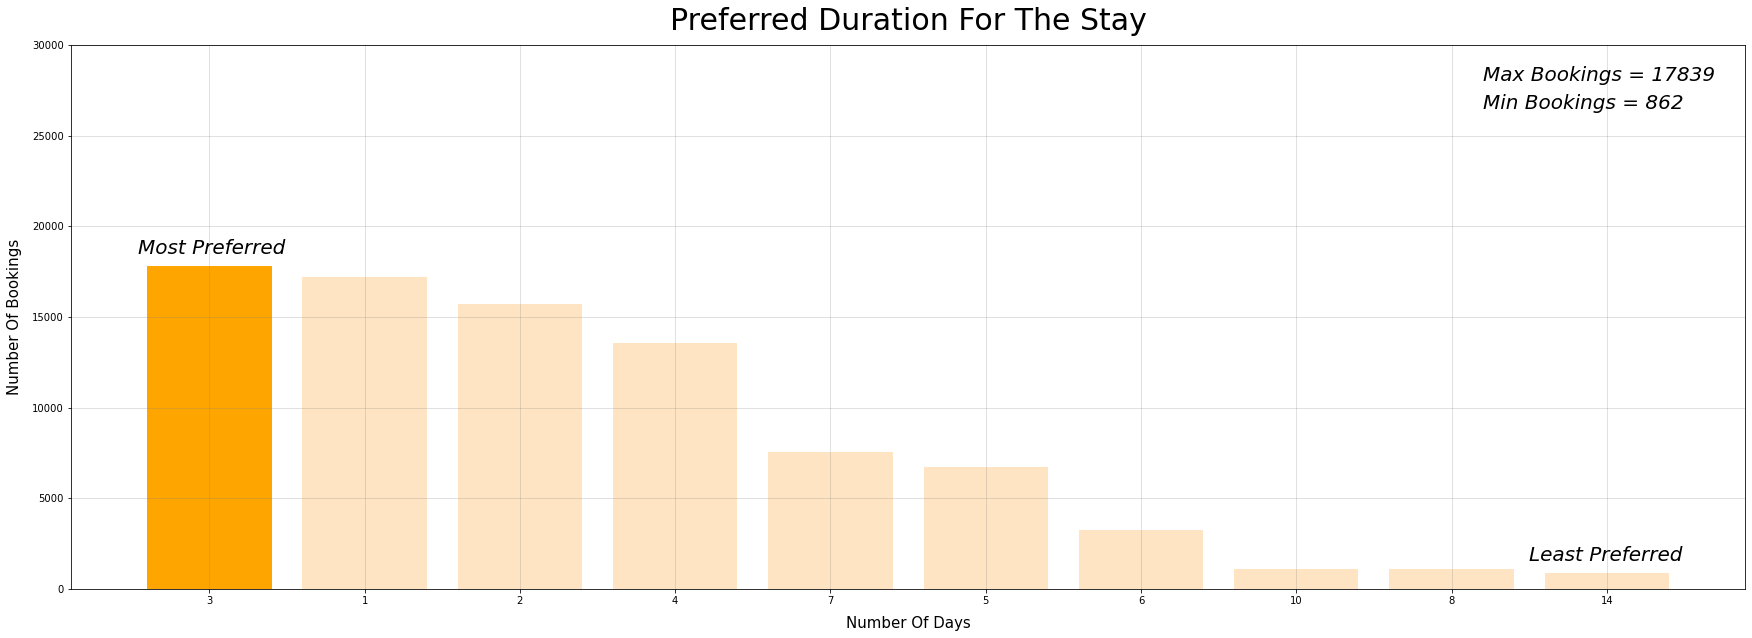

In [39]:
plt.figure(figsize = (30, 10))

x_pos = np.arange(0, 10)

plt.bar(x_pos, max_days['bookings'], color = 'bisque', width = 0.8)[0].set_color('orange')

plt.xticks(x_pos, max_days['days_stayed'])

plt.title('Preferred Duration For The Stay', fontsize = 30, pad = 15)
plt.xlabel('Number Of Days', fontsize = 15, labelpad = 10)
plt.ylabel('Number Of Bookings', fontsize = 15, labelpad = 10)

plt.ylim(0, 30000)

plt.annotate('Most Preferred', fontstyle = 'italic', xy = (0, 0), xytext = (-0.46, 18500), fontsize = 20)
plt.annotate('Least Preferred', fontstyle = 'italic', xy = (0, 0), xytext = (8.5, 1523), fontsize = 20)
plt.annotate('Max Bookings = 17839', fontstyle = 'italic', xy = (0, 0), xytext = (8.2, 28000), fontsize = 20)
plt.annotate('Min Bookings = 862', fontstyle = 'italic', xy = (0, 0), xytext = (8.2, 26500), fontsize = 20)

plt.grid(alpha = 0.3, color = 'grey')

plt.show()

- So, this plot informs us that the most preferred duration for the stay is of 3 days along with least preferred being 14 days. But it is important to understand that these statistics are from the top 10 preferences. And, if this was not the case then the least preferred duration would be 60 days.


- Also this analysis is for the entire dataset regardless of the type of hotel. For better understanding we can plot the above data for the most preferred duration on the basis of types of hotels. For this purpose we have to sort the data by grouping them on the basis of "Hotel" (type). And further we can plot them accordingly.

In [40]:
df['duration'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']

In [41]:
df.groupby(['hotel', 'duration']).count()

is_canceled  lead_time  arrival_date_year  \
hotel        duration                                              
City Hotel   0                 288        288                288   
             1               10284      10284              10284   
             2               10824      10824              10824   
             3               13552      13552              13552   
             4                9620       9620               9620   
...                            ...        ...                ...   
Resort Hotel 45                  1          1                  1   
             46                  1          1                  1   
             56                  2          2                  2   
             60                  1          1                  1   
             69                  1          1                  1   

                       arrival_date_month  arrival_date_week_number  \
hotel        duration                                                 
City Hotel   0                        288                       288   
             1                      10284                     10284   
             2                      10824                     10824   
             3                      13552                     13552   
             4                       9620                      9620   
...                                   ...                       ...   
Resort Hotel 45                         1                         1   
             46                         1                         1   
             56                         2                         2   
             60                         1                         1   
             69                         1                         1   

                       arrival_date_day_of_month  stays_in_weekend_nights  \
hotel        duration                                                       
City Hotel   0                               288                      288   
             1                             10284                    10284   
             2                             10824                    10824   
             3                             13552                    13552   
             4                              9620                     9620   
...                                          ...                      ...   
Resort Hotel 45                                1                        1   
             46                                1                        1   
             56                                2                        2   
             60                                1                        1   
             69                                1                        1   

                       stays_in_week_nights  adults  children  babies   meal  \
hotel        duration                                                          
City Hotel   0                          288     288       288     288    288   
             1                        10284   10284     10283   10284  10284   
             2                        10824   10824     10822   10824  10824   
             3                        13552   13552     13552   13552  13552   
             4                         9620    9620      9620    9620   9620   
...                                     ...     ...       ...     ...    ...   
Resort Hotel 45                           1       1         1       1      1   
             46                           1       1         1       1      1   
             56                           2       2         2       2      2   
             60                           1       1         1       1      1   
             69                           1       1         1       1      1   

                       country  market_segment  distribution_channel  \
hotel        duration                                                  
City Hotel   0             

- The above table is now grouped accordingly but still doesn't convey any information related to duration preferences. So I will create different tables on the basis of hotel type and plot them separately.

In [42]:
h_days = df.loc[df['hotel']=='City Hotel', ['hotel', 'duration']]

In [43]:
h_days = h_days['duration'].value_counts().head(10)

In [44]:
h_days = pd.DataFrame({'duration' : h_days.index,
                      'bookings' : h_days.values})

In [45]:
h_days = h_days.sort_values('duration')

In [46]:
h_days

,duration,bookings
8,0,288
2,1,10284
1,2,10824
0,3,13552
3,4,9620
4,5,4180
6,6,1645
5,7,1851
7,8,366
9,9,199


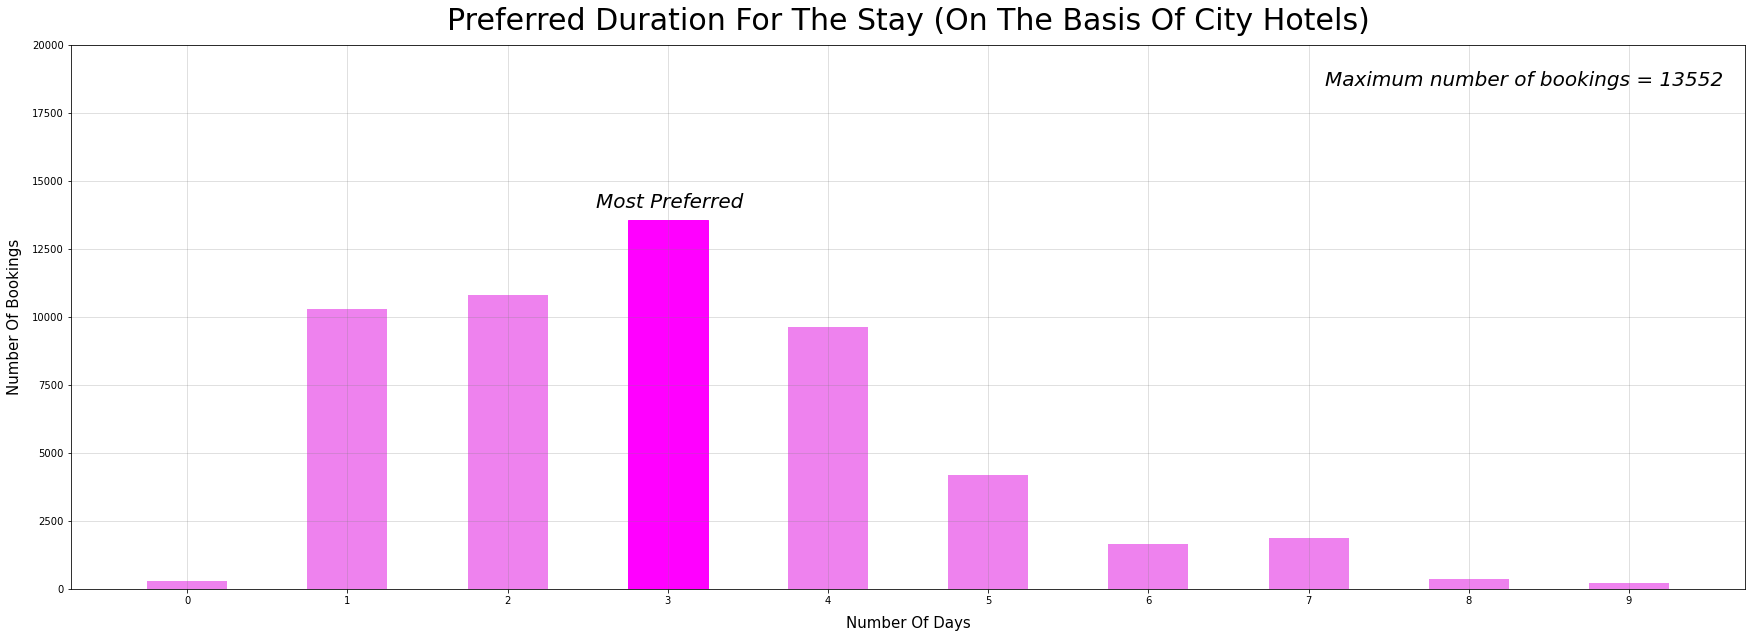

In [47]:
plt.figure(figsize = (30, 10))

x_pos1 = np.arange(0, 10)

plt.bar(x_pos1, h_days['bookings'], color = 'violet', width = 0.5)[3].set_color('fuchsia')
plt.xticks(x_pos1, h_days['duration'])

plt.title('Preferred Duration For The Stay (On The Basis Of City Hotels)', fontsize = 30, pad = 15)
plt.xlabel('Number Of Days', fontsize = 15, labelpad = 10)
plt.ylabel('Number Of Bookings', fontsize = 15, labelpad = 10)

plt.ylim(0, 20000)

plt.annotate('Most Preferred', fontstyle = 'italic', xy = (0, 0), xytext = (2.55, 14000), fontsize = 20)
plt.annotate('Maximum number of bookings = 13552', fontstyle = 'italic', xy = (0, 0), xytext = (7.1, 18500), fontsize = 20)

plt.grid(alpha = 0.3, color = 'grey')

plt.show()

- As you can see that the most preferred duration is of 3 days for "City Hotel" followed by the least preferred being 9 days. Note that the above statistics is from the top 10 preferences and it stays true only for a particular type of hotel

In [48]:
r_days = df.loc[df['hotel']=='Resort Hotel', ['hotel', 'duration']]

In [49]:
r_days = r_days['duration'].value_counts().head(10)

In [50]:
r_days = pd.DataFrame({'duration' : r_days.index,
                      'bookings' : r_days.values})

In [51]:
r_days = r_days.sort_values('duration')

In [52]:
r_days

,duration,bookings
0,1,6900
2,2,4921
3,3,4287
4,4,3955
5,5,2562
6,6,1626
1,7,5676
9,8,701
7,10,885
8,14,771


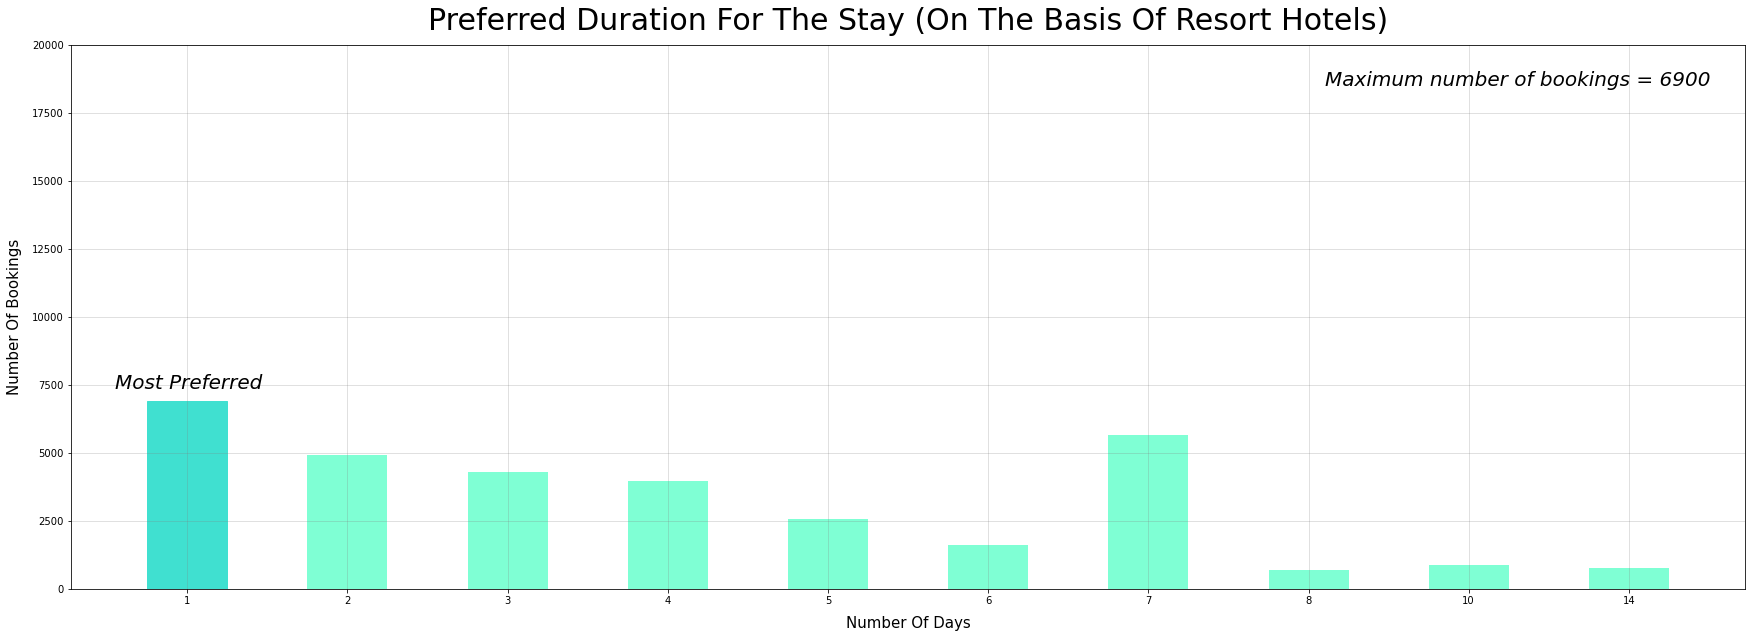

In [53]:
plt.figure(figsize = (30, 10))

x_pos2 = np.arange(0, 10)

plt.bar(x_pos2, r_days['bookings'], color = 'aquamarine', width = 0.5)[0].set_color('turquoise')
plt.xticks(x_pos2, r_days['duration'])

plt.title('Preferred Duration For The Stay (On The Basis Of Resort Hotels)', fontsize = 30, pad = 15)
plt.xlabel('Number Of Days', fontsize = 15, labelpad = 10)
plt.ylabel('Number Of Bookings', fontsize = 15, labelpad = 10)

plt.ylim(0, 20000)

plt.annotate('Most Preferred', fontstyle = 'italic', xy = (0, 0), xytext = (-0.45, 7348), fontsize = 20)
plt.annotate('Maximum number of bookings = 6900', fontstyle = 'italic', xy = (0, 0), xytext = (7.1, 18500), fontsize = 20)

plt.grid(alpha = 0.3, color = 'grey')

plt.show()

- Okay, so there is a little twist for "Resort Hotel" as the most preferred duration came out to be for 1 day and the least being 14 days provided that the analysis is done for top 10 preferences.


- Preferences for duration is mostly related to the destination visited. And preferences for countries can vary significantly. But it is very exciting to know the most preferred countries among 195.

In [54]:
all_country = df['country'].value_counts()

In [55]:
all_country = pd.DataFrame({'country' : all_country.index,
                           'bookings' : all_country.values})

In [56]:
all_country = all_country.sort_values('country')

In [57]:
all_country

,country,bookings
127,ABW,2
24,AGO,342
169,AIA,1
90,ALB,11
103,AND,7
...,...,...
155,VGB,1
96,VNM,8
39,ZAF,78
143,ZMB,2


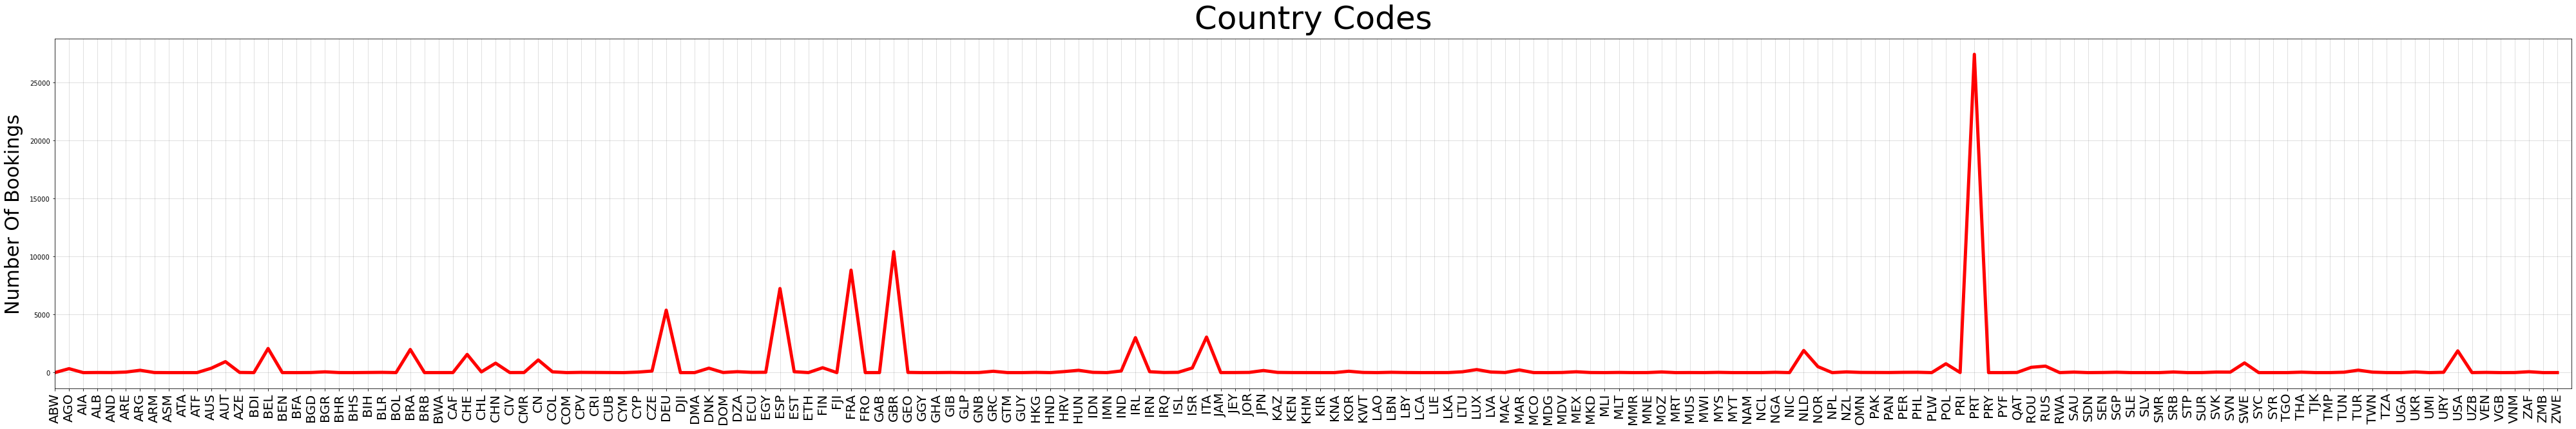

In [58]:
plt.figure(figsize = (70, 10))

x_pos_all = np.arange(0, 177)
plt.plot(x_pos_all, all_country['bookings'], color = 'red', linewidth = 5)

plt.xticks(x_pos_all, all_country['country'], fontsize = 20, rotation = 90)

plt.title('Country Codes', fontsize = 50, pad = 15)

plt.ylabel('Number Of Bookings', fontsize = 30, labelpad = 10)

plt.xlim(0, 177)

plt.grid(alpha = 0.3, color = 'grey')

plt.show()

- The above plot clearly tells us about the top 5 countries in terms of preference. So, in order to know more about the most preferred countries let's have a closer look at the plot in the form of a bar chart which is shown below.

In [59]:
df['country'].value_counts().head()

PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
Name: country, dtype: int64

In [60]:
top_country = df['country'].value_counts().head()

In [61]:
top_country = pd.DataFrame({'country' : top_country.index,
                           'bookings' : top_country.values})

In [62]:
top_country['country_n'] = ['Portugal', 'United Kingdom', 'France', 'Spain', 'Germany']

In [63]:
top_country

,country,bookings,country_n
0,PRT,27453,Portugal
1,GBR,10433,United Kingdom
2,FRA,8837,France
3,ESP,7252,Spain
4,DEU,5387,Germany


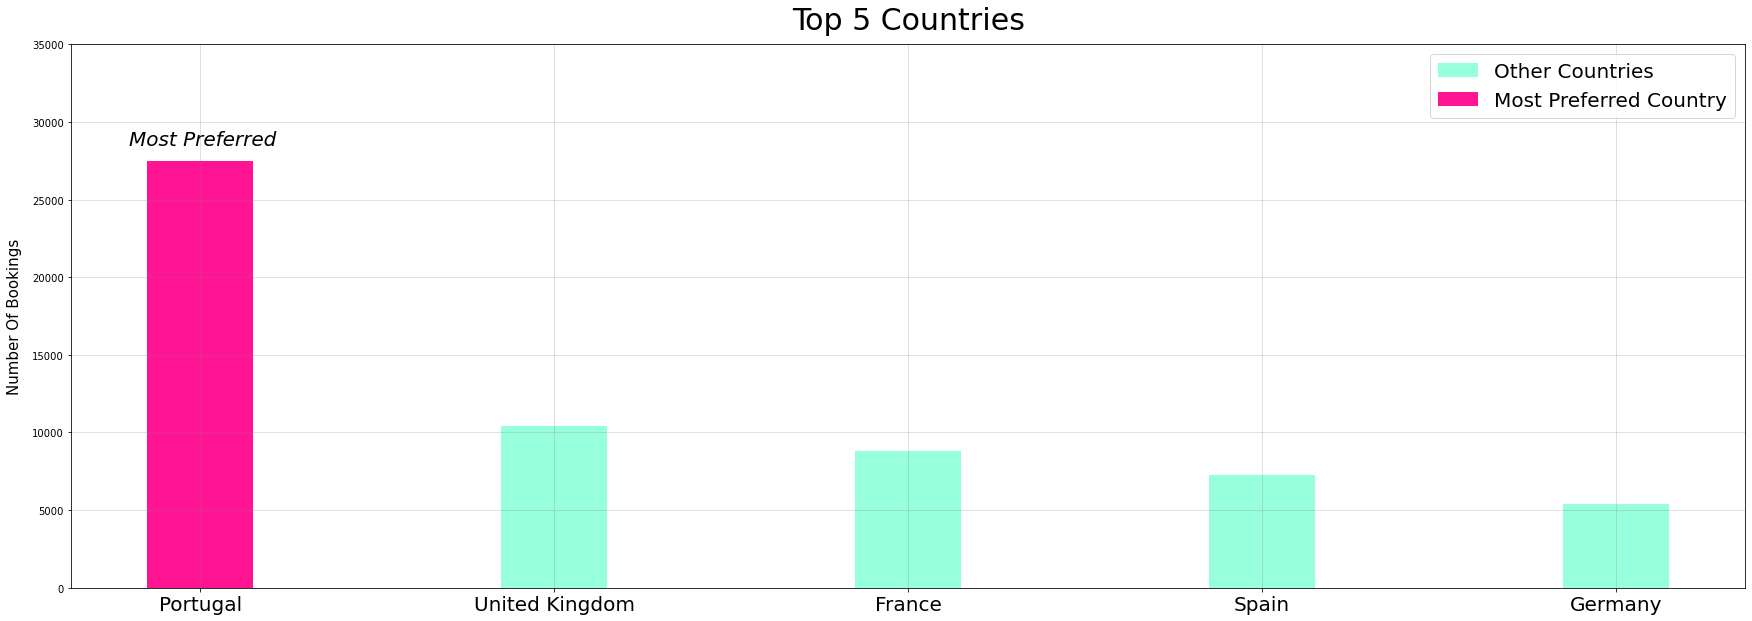

In [64]:
plt.figure(figsize = (30, 10))

x_pos = np.arange(0, 5)
plt.bar(x_pos, top_country['bookings'], color = 'aquamarine', width = 0.3, alpha = 0.8, label = 'Other Countries')
plt.xticks(x_pos, top_country['country_n'], fontsize = 20)
plt.bar(0, 27453, width = 0.3, color = 'deeppink', label = 'Most Preferred Country')

plt.title('Top 5 Countries', fontsize = 30, pad = 15)

plt.ylabel('Number Of Bookings', fontsize = 15, labelpad = 10)

plt.ylim(0, 35000)

plt.legend(fontsize = 20)

plt.annotate('Most Preferred', fontstyle = 'italic', xy = (0, 0), xytext = (-0.2, 28500), fontsize = 20)

plt.grid(alpha = 0.3, color = 'grey')

plt.show()

- After having a closer look at the top 5 preferences we get to know that "Portugal" leads the race with a staggering number of bookings being 27453, followed by "United Kingdom", "France", "Spain" and lastly being "Germany".


- Since Portugal witnesses some of the best beaches in the world namely: "Praia de moledo", "Praia do carvalhal", "Portinho da Arrabida", etc, it becomes very easy place for vacation. Apart form this, there is a selection of cafes and restaurants on the clifftops overlooking the beach. No wonder Portugal is the most preferred countries to visit.


- Preferences don't end here as the most targetting factor for a hotel bussiness is the most suitable month for vacations. In order to study this aspect let us plot the appropriate data month-wise.

In [65]:
top_month = df['arrival_date_month'].value_counts()

In [66]:
top_month = pd.DataFrame({'month' : top_month.index,
                         'bookings' : top_month.values})

In [67]:
top_month = top_month.sort_values('bookings')

In [68]:
top_month

,month,bookings
11,January,4693
10,November,4995
9,December,5131
8,February,6098
7,September,6690
6,October,6934
5,March,7513
4,June,7765
3,April,7908
2,May,8355


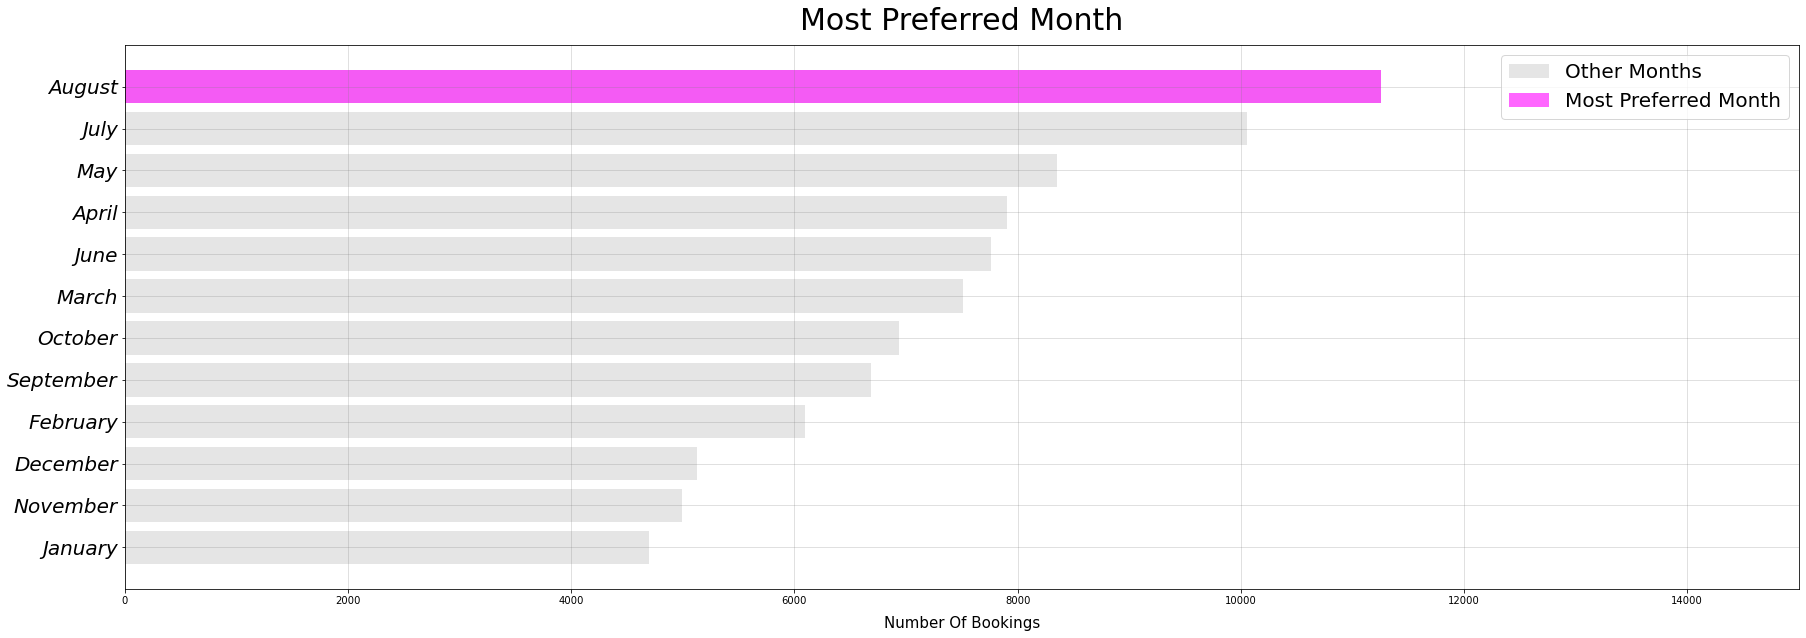

In [69]:
plt.figure(figsize = (30, 10))

y_pos = np.arange(0, 12)

plt.barh(y_pos, top_month['bookings'], alpha = 0.4, color = 'silver', label = 'Other Months')
plt.yticks(y_pos, top_month['month'], fontsize = 20, fontstyle = 'italic')
plt.barh(11, 11257, alpha = 0.6, color = 'fuchsia', label = 'Most Preferred Month')

plt.title('Most Preferred Month', fontsize = 30, pad = 15)
plt.xlabel('Number Of Bookings', fontsize = 15, labelpad = 10)

plt.xlim(0, 15000)

plt.legend(fontsize = 20)

plt.grid(alpha = 0.3, color = 'grey')

plt.show()

- The above graphical representation tells us that "August" is the most suitable and preferred month for hotel bookings. And since the dataset doesn't provide us with "pupose of visit", so we cannot clearly tell whether the visit was a vacation or a business meeting.


- Let us now group data instead of plotting a graph in order to find some information related to "lead_time" i.e., "Number of days that elapsed between the entering date of the booking into the PMS and the arrival date". Although this information is not crucial but still it will help us to know more about the customers.

In [70]:
lt_df = df.groupby(['arrival_date_year', 'arrival_date_month']).sum()['lead_time']

In [71]:
lt_df = pd.DataFrame(lt_df)

In [72]:
lt_df.dropna(inplace = True)

In [73]:
lt_df

lead_time
arrival_date_year arrival_date_month           
2015              August               144296.0
                  December              76836.0
                  July                 133586.0
                  November              58955.0
                  October              156569.0
                  September            211135.0
2016              April                224308.0
                  August               465581.0
                  December             225878.0
                  February              72744.0
                  January               41137.0
                  July                 400973.0
                  June                 317466.0
                  March                162965.0
                  May                  305735.0
                  November             178722.0
                  October              418413.0
                  September            419270.0
2017              April                375556.0
                  August               545982.0
                  February             141460.0
                  January              120599.0
                  July                 591424.0
                  June                 489960.0
                  March                238297.0
                  May                  464339.0

- The above table consists of the required information related to "lead_time" i.e., "Number of days that elapsed between the entering date of the booking into the PMS and the arrival date". The above information is presented in the form of a table which is grouped by "arrival_date_year" i.e., "year of arrival" and "arrival_date_month" i.e., "month of arrrival". And the grouping of the table is calculated by aggregating the sum of the values of "lead_time".


- The values of "lead_time" doesn't clearly tell us anything related to bookings, rather it tells us about the behaviour of the customer i.e., how much time a customer takes to actually arrive in the hotel after a successful booking.


- The above table can be further represented in the form graphs but for that I have to first concatenate the "arrival_date_year" and "arrival_date_month" columns i.e., "year of arrival" and "month of arrival" respectively for better analysis.

In [74]:
lt_df.reset_index(inplace = True)

In [75]:
lt_df.head()

,arrival_date_year,arrival_date_month,lead_time
0,2015,August,144296.0
1,2015,December,76836.0
2,2015,July,133586.0
3,2015,November,58955.0
4,2015,October,156569.0


In [76]:
lt_df[['arrival_date_year', 'arrival_date_month']] = lt_df[['arrival_date_year', 'arrival_date_month']].astype('str')

In [77]:
lt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arrival_date_year   26 non-null     object 
 1   arrival_date_month  26 non-null     object 
 2   lead_time           26 non-null     float64
dtypes: float64(1), object(2)
memory usage: 752.0+ bytes


In [78]:
lt_df['y_m'] = lt_df['arrival_date_year'].str.cat(lt_df['arrival_date_month'], sep = ', ')

In [79]:
lt_df.drop(['arrival_date_year', 'arrival_date_month'], axis = 1, inplace = True)

In [80]:
lt_df.head()

,lead_time,y_m
0,144296.0,"2015, August"
1,76836.0,"2015, December"
2,133586.0,"2015, July"
3,58955.0,"2015, November"
4,156569.0,"2015, October"


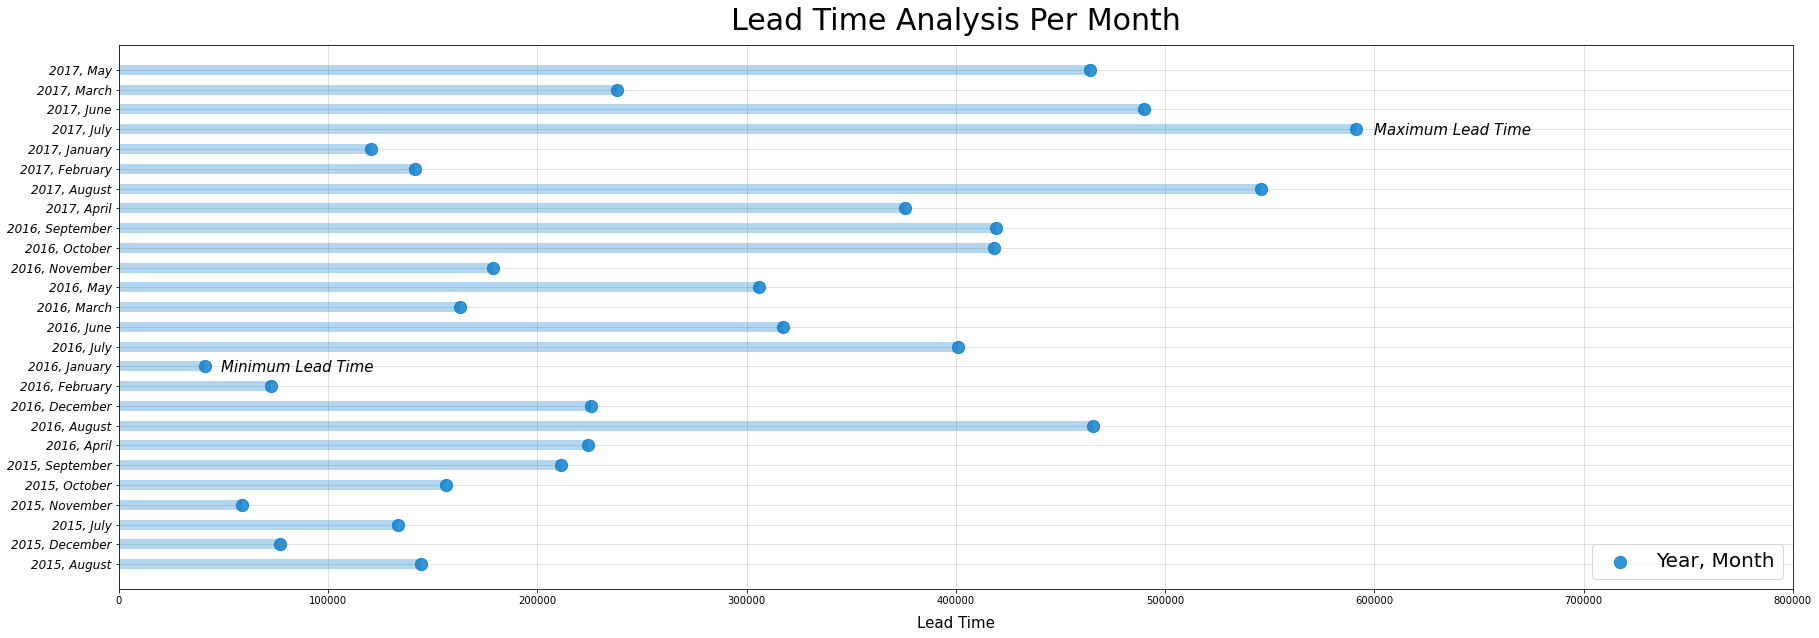

In [81]:
plt.figure(figsize = (30, 10))

y_pos = np.arange(0, 26)

plt.hlines(y = y_pos, xmin = 0, xmax = lt_df['lead_time'], color = '#007ACC', alpha = 0.3, linewidth = 10)

plt.scatter(lt_df['lead_time'], y_pos, color = '#007ACC', alpha = 0.8, s = 150, label = 'Year, Month')
plt.yticks(y_pos, lt_df['y_m'], fontsize = 12, fontstyle = 'italic')
plt.title('Lead Time Analysis Per Month', fontsize = 30, pad = 15)
plt.xlabel('Lead Time', fontsize = 15, labelpad = 10)

plt.xlim(0, 800000)

plt.annotate('Maximum Lead Time', fontstyle = 'italic', xy = (0, 0), xytext = (600000, 21.7), fontsize = 15)
plt.annotate('Minimum Lead Time', fontstyle = 'italic', xy = (0, 0), xytext = (49000, 9.7), fontsize = 15)

plt.legend(fontsize = 20, loc = 'lower right')

plt.grid(alpha = 0.3, color = 'grey')

plt.show()

- From the above plot we can gather related information about lead time per month. The graphical information consists of the maximum and minimum values of the data. July month of year 2017 experienced maximum lead time while January month of year 2016 experienced minimum lead time along with minimal deflections throughout the year.


- Since the data is not sorted, it looks a bit untidy. So, in order to improve the graphical representation of the data let us first sort the data in terms of "lead time" and then try to plot it in the same way as plotted above.

In [82]:
lt_df_sorted = lt_df.sort_values('lead_time')

In [83]:
lt_df_sorted.head()

,lead_time,y_m
10,41137.0,"2016, January"
3,58955.0,"2015, November"
9,72744.0,"2016, February"
1,76836.0,"2015, December"
21,120599.0,"2017, January"


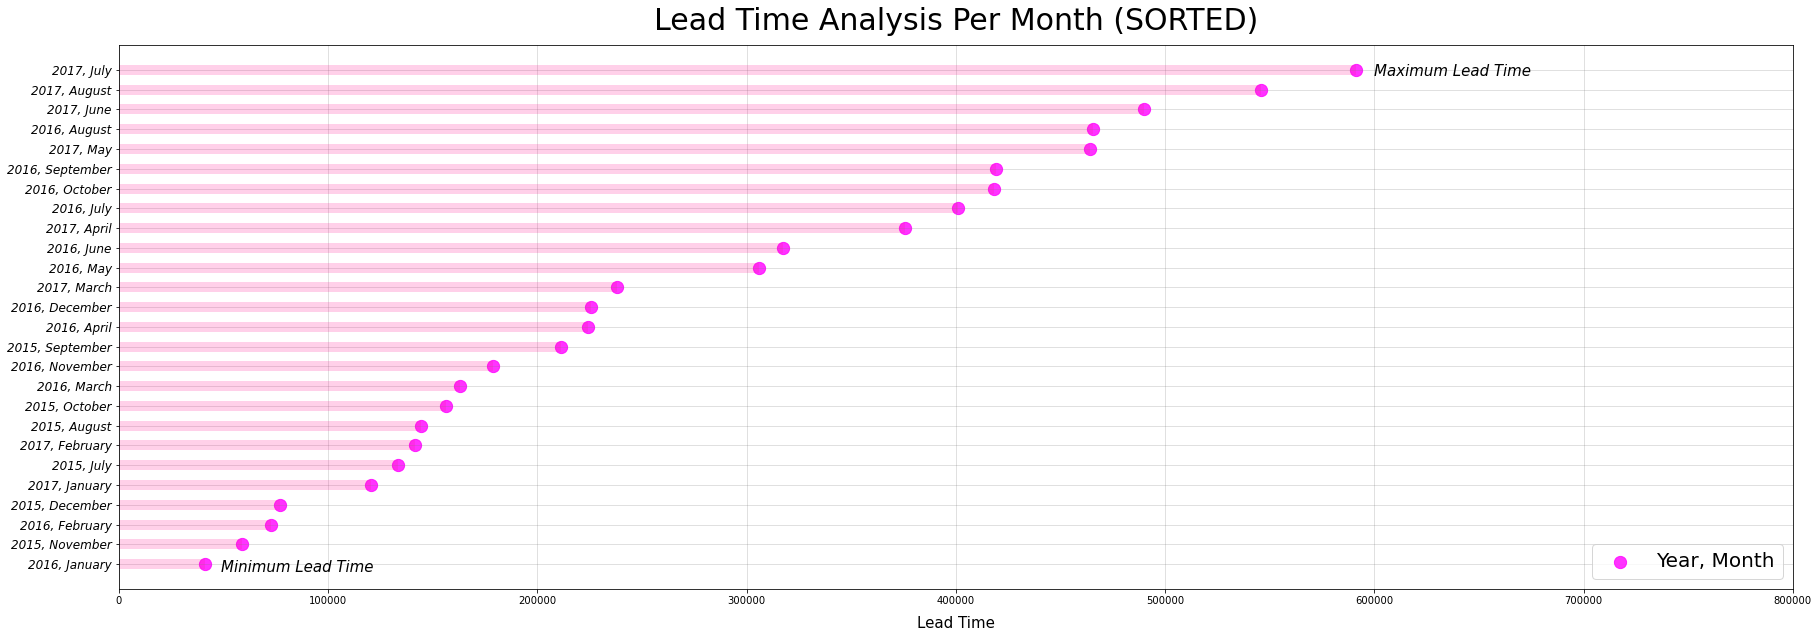

In [84]:
plt.figure(figsize = (30, 10))

y_pos = np.arange(0, 26)

plt.hlines(y = y_pos, xmin = 0, xmax = lt_df_sorted['lead_time'], color = 'deeppink', alpha = 0.2, linewidth = 10)

plt.scatter(lt_df_sorted['lead_time'], y_pos, color = 'magenta', alpha = 0.8, s = 150, label = 'Year, Month')
plt.yticks(y_pos, lt_df_sorted['y_m'], fontsize = 12, fontstyle = 'italic')
plt.title('Lead Time Analysis Per Month (SORTED)', fontsize = 30, pad = 15)
plt.xlabel('Lead Time', fontsize = 15, labelpad = 10)

plt.xlim(0, 800000)

plt.annotate('Maximum Lead Time', fontstyle = 'italic', xy = (0, 0), xytext = (600000, 24.7), fontsize = 15)
plt.annotate('Minimum Lead Time', fontstyle = 'italic', xy = (0, 0), xytext = (49000, -0.4), fontsize = 15)

plt.legend(fontsize = 20, loc = 'lower right')

plt.grid(alpha = 0.3, color = 'grey')

plt.show()

- Now the above plot looks clear and tidy as compared to the previous plot and the maximum and minimum values are easily witnessed.


- After this, let us try to find what fraction of people are newly married couples. In order to find this, the most important attributes are "gender" and "age" but unfortunately none of these is mentioned in the dataset. Although there are times when "gender" and "age" cannot tell us anything about newly married couples as there are people who get married at an older age and also there are same-sex marrriages.


- Apart from this condition, some of the possible ways of finding newly married couples using the attributes mentioned in the original dataset are:
    1. Number of babies in bookings = 0
    2. Number of children in bookings = 0
    3. Number of adults in bookings = 2

In [85]:
df['adults'].count()

87396

In [86]:
df.loc[ df['adults']!=2  , 'adults'].count()

22899

In [87]:
df.loc[ (df['children']==0) & (df['babies']==0) & (df['adults']==2) , 'adults'].value_counts()

2    56579
Name: adults, dtype: int64

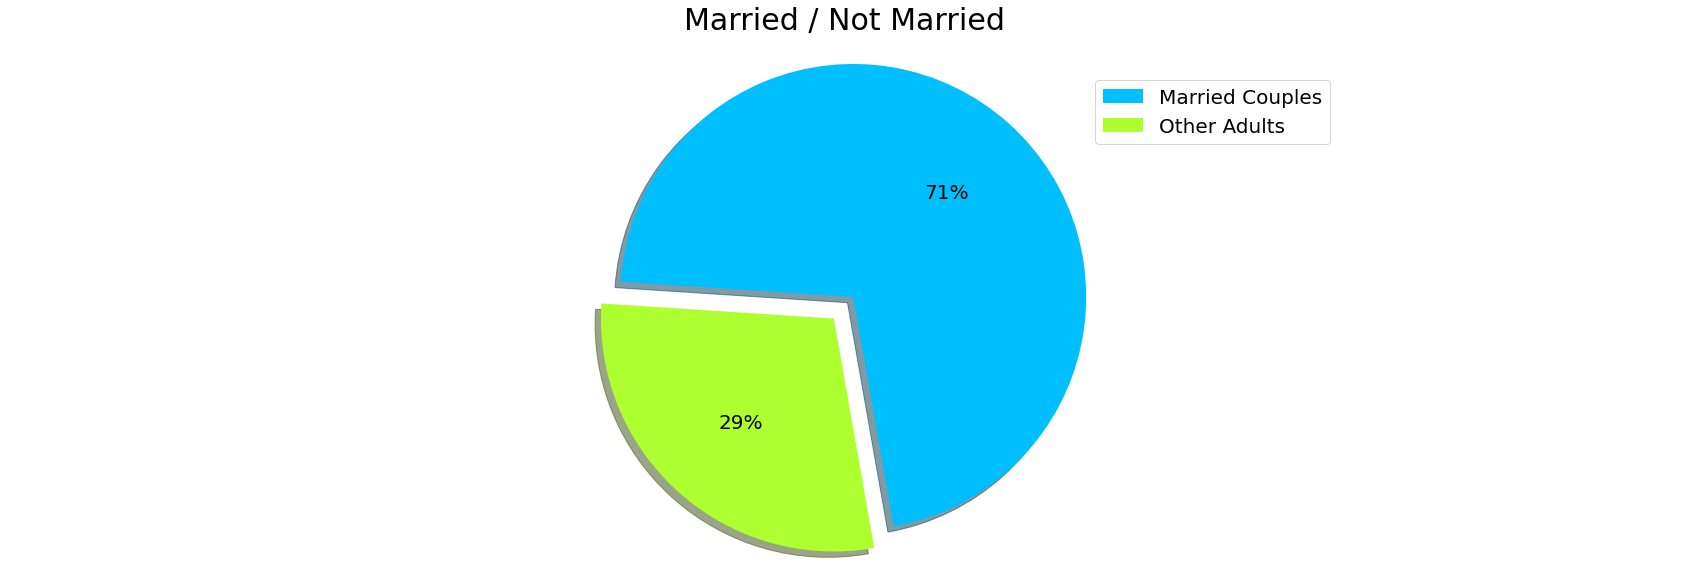

In [88]:
plt.figure(figsize = (30, 10))

plt.pie([56579, 22899], radius = 0.8, autopct = '%0.0f%%',startangle = -80 , explode = [0.1, 0], shadow = True, colors = ['deepskyblue', 'greenyellow'], textprops = {'fontsize' : 20})

plt.title('Married / Not Married', fontsize = 30)

plt.legend(fontsize = 20, loc = [0.65, 0.8], labels = ['Married Couples', 'Other Adults'])

plt.axis('equal')

plt.show()

- So after plotting the data according to the possible conditions mentioned above, we can see that a huge fraction people were actually newly married couples. It clearly tells us that around 71% of the adults were newly married and they actually went for vacations.


- Therefore analysis of different attributes can be obtained similarly. More than just plotting data it is important to find new ways to enhance your data pre-processing methods which could later help you in taking decisions efficiently.


- With this I end my EDA on "Hotel Bookings" after analysing all the essential attributes and visualising them one by one. The leftover features can be visualised similary.


- Other than the mentioned attributes I have also done analysis on "Married Couples" with the help of the given data. Similarly you can also construct your own ways to find information from the data which is not easily visible in the original dataset.

----------------------